# Ingest

In [6]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
print(df.columns)
print(df.shape)
df.head()

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')
(44582, 5)


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [7]:
df.tail()


,date,state,fips,cases,deaths
44577,2022-05-17,Virginia,51,1744306,20328
44578,2022-05-17,Washington,53,1541725,12857
44579,2022-05-17,West Virginia,54,507238,6903
44580,2022-05-17,Wisconsin,55,1647035,14508
44581,2022-05-17,Wyoming,56,157409,1820


# EDA

In [8]:
df.describe()

,fips,cases,deaths
count,44582.000000,4.458200e+04,44582.000000
mean,32.135907,5.707010e+05,8953.530326
std,18.741658,9.870142e+05,14008.656249
min,1.000000,1.000000e+00,0.000000
25%,17.000000,3.745900e+04,665.000000
50%,31.000000,2.080800e+05,3276.000000
75%,46.000000,6.979412e+05,10913.000000
max,78.000000,9.398846e+06,91058.000000


<AxesSubplot:xlabel='cases', ylabel='deaths'>

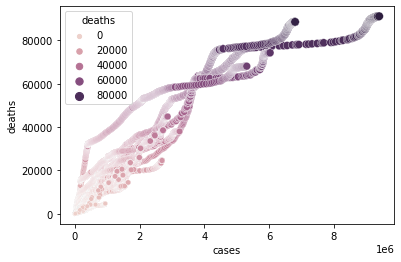

In [9]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

## Date-based EDA

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2022-05-17', '2022-05-17', '2022-05-17', '2022-05-17',
               '2022-05-17', '2022-05-17', '2022-05-17', '2022-05-17',
               '2022-05-17', '2022-05-17'],
              dtype='datetime64[ns]', name='date', length=44582, freq=None)

In [11]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2022-05-18
Two days ago 2022-05-16


In [12]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-05-16,Alabama,1,1305665,19631
2022-05-16,Alaska,2,254467,1228
2022-05-16,American Samoa,60,5930,30
2022-05-16,Arizona,4,2030925,30230
2022-05-16,Arkansas,5,838684,11418


In [14]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2022-05-17,California,6,9398846,91058
2022-05-16,California,6,9359245,90986
2022-05-17,Texas,48,6802180,88462
2022-05-16,Texas,48,6799028,88452
2022-05-17,Florida,12,6030141,74241
2022-05-16,Florida,12,6021780,74239
2022-05-17,New York,36,5309983,68033
2022-05-16,New York,36,5301899,68004
2022-05-17,Pennsylvania,42,2868494,44856


## state based analysis

In [17]:
top_ten_states = list(current_df["state"].head(10).values)
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")
top_ten_states

['California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'New York',
 'New York',
 'Pennsylvania',
 'Pennsylvania']

<Figure size 1080x360 with 0 Axes>

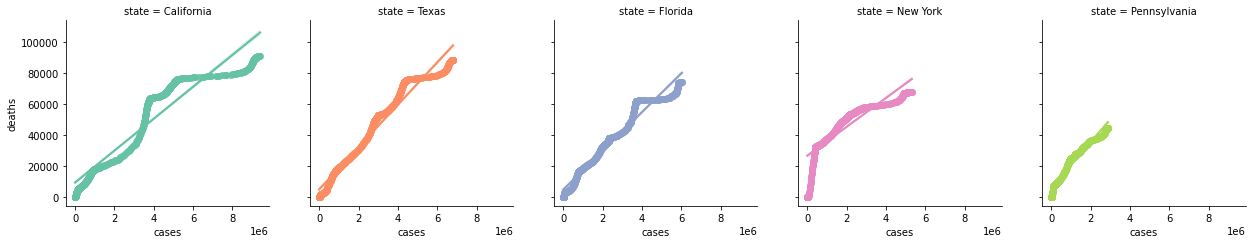

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)


In [19]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


# Modeling; placeholder


In [ ]:
## - Things to keep in mind ##
- This is where the modeling code lives as this repeatability can be critical since the MLOps pipeline may need to reference how the model creation occcured
- 

# Conclusion; placeholder

- Should be a summary for a business leader making the decision